# Lab 6
---
DSCI 510 (Hermjakob), Spring 2025, USC

Hello and welcome to Lab 6.

__Guidelines:__

- Please write and submit the two programs below by the deadline: Monday, March 3, 2025, at 6:00pm Pacific time

- You must complete the assignments individually. If you have trouble completing the assignment, please let one of the teaching assistants (TAs) know, during the lab or their office hours. They will help and guide you, but they will not write code for you and no one else should :) !!!  

- You have to fill in the code in this notebook and upload it back to Brightspace for submission. Please remember to rename your file as "Lab6_[YOUR FIRSTNAME]_[YOUR LASTNAME].ipynb" (e.g. Lab6_George_Washington.ipynb).

- You may look up resources online like python docs and stackoverflow. You may look up topics, but not the questions themselves.

- You can submit only one time. Your grade will be based on this submission.

# Q1 [12 points]
### Temperature Conversion Table

**Python topics:** keyword arguments, \*args, \*\*kwargs; string formatting

Write a robust function *temp_table* that builds and returns a temperature conversion table.

**Input:**
* First argument: source scale indicator (string), either 'C' (for Celsius) or 'F' (for Fahrenheit)
* Followed by a number of numerical arguments representing temperatures (on source scale)
* Followed by optional keyword arguments
    * n_dec (integer): number of decimal places to be printed after any decimal period (default: 0)
    * degree_s (string): string that separates temperature value and temperature scale indicator (default: '°')

**Output:**
* A string with a text table of temperature conversions from source to target scale (C→F or F→C).
* Allocate at least 3 positions for sign and integer portion of temperature.
* If *n_dec* is 0, the temperature should be printed as an integer, otherwise as a float.
* Report any invalid source scale, temperature values, keyword arguments to sys.stderr.

Your function *temp_table* must be **robust**. It must deal with missing arguments, arguments of the wrong type, and any values that it is called with.

**Sample call and output:**
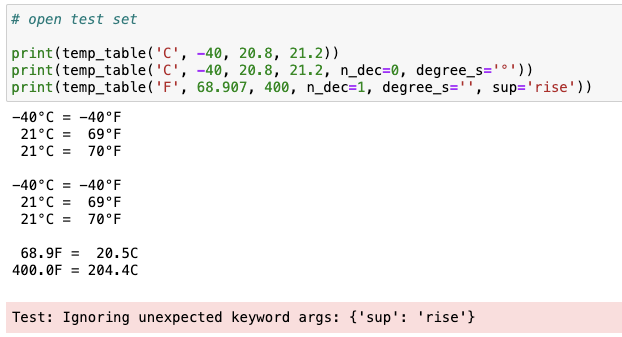

In [10]:
import sys 
#Define functions
def temp_conversion(temp_value , temp_unit):

    if temp_unit == 'C':
        #F = (C * 9/5) + 32
        new_temp = (temp_value * 9/5) + 32
    elif temp_unit == 'F':
        #C = (F - 32) * 5/9 
        new_temp = (temp_value - 32) * 5/9

    return new_temp

#temperature table output
def temp_table(unit, *temp_values,**kwargs):

    #Error handling for temperature unit
    try: 
        conversion_unit = unit.strip().lower()
    except:
        return sys.stderr.write(f'{unit} not a valid temperature unit')
        
    if conversion_unit in ['f','fahrenheit']:
        conversion_unit = 'F'
        conversion_unit_opposite = 'C'
    elif conversion_unit in ['c','celsius']:
        conversion_unit = 'C'
        conversion_unit_opposite = 'F'
    else:
        return sys.stderr.write(f'{unit} not a valid temperature unit')

    #Error handling for Args
    #empty argument list
    if len(temp_values) == 0:
        sys.stderr.write('argument input is empty')
        return None

    #Error handling for Kwargs
    #Ensure n_dec and degree_s are correct type and set default value for n_dec
    if 'n_dec' in kwargs:
        if not isinstance(kwargs['n_dec'],int) or kwargs['n_dec'] < 0:
            return sys.stderr.write('n_dec not a valid integer\n')
    else:
        kwargs['n_dec'] = 0
     
    degree_sign = kwargs.get('degree_s','°')
    if not isinstance(degree_sign,str):
        return sys.stderr.write('degree_s not a valid string\n')

    #error handling for unexpected keyword arguments
    for key,val in kwargs.items():
        if key != 'n_dec' and key != 'degree_s':
            sys.stderr.write(f"Ignoring unexpected keyword '{key}': {val} ")

    #Convert temperature for each argument value
    new_temp_table = ''

    invalid_temp = []
    for temp_value in temp_values:
        #handle non-float or integer inputs
        try:
            temp_float = float(temp_value)
        except:
            invalid_temp.append(str(temp_value))

        #Round to n_dec, round() rounds to integer
        if kwargs['n_dec'] > 0:
            new_temp_value = round(temp_conversion(temp_float,conversion_unit),kwargs.get('n_dec'))
            og_temp_value_rounded = round(temp_float,kwargs.get('n_dec'))
        else:
            new_temp_value = round(temp_conversion(temp_float,conversion_unit))
            og_temp_value_rounded = round(temp_float) 
        
        new_temp_table += f'{og_temp_value_rounded}{degree_sign}{conversion_unit} = {new_temp_value}{degree_sign}{conversion_unit_opposite}\n'

    if invalid_temp:
        for temp_value in invalid_temp:
            sys.stderr.write(f'{temp_value} not a valid temperature value\n')

    return new_temp_table
        

In [11]:
# open test set

print(temp_table('C', -40, 20.8, 21.2))
print(temp_table('C', -40, 20.8, 21.2, n_dec=0, degree_s='°'))
print(temp_table('F', 68.907, 400, n_dec=1, degree_s='', sup='rise'))

-40°C = -40°F
21°C = 69°F
21°C = 70°F

-40°C = -40°F
21°C = 69°F
21°C = 70°F

68.9F = 20.5C
400.0F = 204.4C



Ignoring unexpected keyword 'sup': rise 

# Q2 [12 points]
### Unicode, Regex: Data cleaning

Check this out:

In [12]:
s1, s2 = "Alexa", "Аlexa"
s1 == s2

False

Surprise? &nbsp; Let's investigate:

In [13]:
# You might want to keep this function for future string checks.

import unicodedata as ud

def print_unicode_names_of_letters(s: str) -> None:
    for letter in s:
        print(f"{letter}  U+{ord(letter):04X}  {ud.name(letter)}")

In [14]:
print_unicode_names_of_letters(s1 + s2)

A  U+0041  LATIN CAPITAL LETTER A
l  U+006C  LATIN SMALL LETTER L
e  U+0065  LATIN SMALL LETTER E
x  U+0078  LATIN SMALL LETTER X
a  U+0061  LATIN SMALL LETTER A
А  U+0410  CYRILLIC CAPITAL LETTER A
l  U+006C  LATIN SMALL LETTER L
e  U+0065  LATIN SMALL LETTER E
x  U+0078  LATIN SMALL LETTER X
a  U+0061  LATIN SMALL LETTER A


So it turns out there are look-alike characters between various scripts.<p>
__Task:__ Write a function _clean_latin_text_ that checks and cleans a line of text as follows.
If a word inside the line contains both Latin and Cyrillic characters and all Cyrillic characters in that word have look-alike Latin characters, as defined in the _cyr2lat_ dictionary below, map all Cyrillic characters in that word to their Latin counterparts. If a word contains no Latin characters, or if some Cyrillic characters do not have any Latin counterparts, don't change any part of the word, as it is not clear that it was really meant to be a Latin-script word.

In [15]:
import regex

def cyrllic_to_lat(match):
    
    cyrillic_char = match[0]
    if match[0] in cyr2lat:
        return cyr2lat[cyrillic_char]
    else:
        return cyrillic_char

cyr2lat = {'Ѕ':'S', 'А':'A', 'В':'B', 'Е':'E', 'К':'K', 'М':'M', 'Н':'H', 'О':'O', 'Р':'P', 
           'С':'C', 'Т':'T', 'Х':'X', 'Ԛ':'Q', 'Ԝ':'W', 'а':'a', 'е':'e', 'о':'o', 'р':'p', 
           'с':'c', 'у':'y', 'х':'x', 'ѕ':'s', 'і':'i', 'ј':'j', 'ԛ':'q', 'ԝ':'w'}

def clean_latin_text(s: str) -> str:
    latin_text = regex.sub(r'\p{IsCyrillic}',cyrllic_to_lat, s)

    return latin_text

In [16]:
# open test

print(clean_latin_text("Аlехаndеr; слава і воля."))
# Should yield: Alexander; слава і воля.  (Use print_unicode_names_of_letters() as needed.)

Alexander; cлaвa i вoля.


# Q3 [6 points]

Write the code for a function __is_palindrome__ that checks whether or not a given string is a palindrome or not.

A palindrome is a string which reads the same backward or forward.

For example, the strings __'racecar'__ or __'step on no pets'__ are palindromes.

In [17]:
def is_palindrome(s: str) -> bool:
    s_reverse = ''
    for i in reversed(range(len(s))):
        s_reverse += s[i]

    if s == s_reverse:
        return True
    else: 
        return False   

In [18]:
# Open test set
print(is_palindrome("racecar"))
print(is_palindrome("step on no pets"))

True
True


# Bonus Question [2+2+2 points]

### Compact code

**Python topics:** sets, lambda functions, map, zip

The _letter-diff-count_ of a pair of words is the number of letters that appear at least once in one of the two words, but not in the other. Write a function that applies the _letter-diff-count_ to two lists of words, pairwise.
For example, in the open test case below, compare _center_ and _centre_ (with a _letter-diff-count_ of 0), then _enrollment_ and _enrolment_ etc. The _letter-diff-count_ of _color_ and _colour_ is 1, because there is 1 letter ('u'), which occurs in one word, but not the other. The _letter-diff-count_ of _defense_ and _defence_ is 2, because there are 2 letters ('c' and 's'), which occur in one word, but not the other.

The expected output for the open test case below is: [0, 0, 1, 2, 2]

__Hint:__ You may consider using the following functions: map, zip, lambda, set, list

### Points:
2 points if the code works<br>
4 points (total) if the code works and the code (_return_ ...) fits onto a single line (not counting the _def_ line), with under 100 characters for the code line.<br>
6 points (total) if the code works and the code line is shorter than the _def_ line. (And no, please don't even think of lengthening the _def_ line.)

In [19]:
from typing import List
def pairwise_letter_diff_counts(words1: List[str], words2: List[str]) -> List[int]:
    return list(map(lambda x,y: len(set(x)^set(y)) ,words1,words2))

In [20]:
# open test
american_english_words = ['center', 'enrollment', 'color', 'catalog', 'defense']
british_english_words = ['centre', 'enrolment', 'colour', 'catalogue', 'defence']
print(pairwise_letter_diff_counts(american_english_words, british_english_words))

[0, 0, 1, 2, 2]
